In [1]:
from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/projects/ae-vae-anomaly-detection/data/processed/cleaned.csv'

Mounted at /content/drive


In [2]:
!mkdir -p /content/src/models

In [3]:
import sys
sys.path.append('/content/src')

from models.ae_model import build_ae, train_autoencoder, plot_training_history

In [4]:
import pandas as pd

#load cleaned data
cleaned_df = pd.read_csv(data_path)
print(f'Loaded cleaned data: {cleaned_df.shape[0]} rows, {cleaned_df.shape[1]} columns')

# get a small sample for training model
df = cleaned_df.sample(frac=1, random_state=42)
print(f'Sampled data: {df.shape[0]} rows, {df.shape[1]} columns')

Loaded cleaned data: 640788 rows, 178 columns
Sampled data: 640788 rows, 178 columns


In [5]:
from sklearn.model_selection import train_test_split

# 1. Separate features and label
X = df.drop(columns='label')
y = df['label']

# 2. First split off a mixed test set (normal+anomaly), stratified to keep the same
#    anomaly ratio in train and test.
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# 3. From the remaining (X_temp / y_temp) we only train on the normal samples:
#    i.e. drop the anomalies from this “train+val pool”
X_train_val = X_temp[y_temp == 0]

# 4. Finally split that normal‐only pool into X_train / X_val
X_train, X_val = train_test_split(
    X_train_val,
    test_size=0.2,
    random_state=42
)

# Now:
#  - X_train, X_val are both *only* normal samples (for AE/VAE training & early stopping)
#  - X_test / y_test is your held‐out mixed set (with both normal and anomalous),
#    and it never overlaps with X_train or X_val

In [6]:
# build model
autoencoder = build_ae(input_dim=X_train.shape[1])

# train model
history, best_model = train_autoencoder(autoencoder, X_train, X_val)

Epoch 1/100
6253/6266 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0322 - mae: 0.0665

6266/6266 ━━━━━━━━━━━━━━━━━━━━ 43s 6ms/step - loss: 0.0322 - mae: 0.0664 - val_loss: 8.5869e-04 - val_mae: 0.0064 - learning_rate: 0.0010
Epoch 2/100
6263/6266 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - mae: 0.0100

6266/6266 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - loss: 0.0015 - mae: 0.0100 - val_loss: 5.0254e-04 - val_mae: 0.0052 - learning_rate: 0.0010
Epoch 3/100
6266/6266 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0091

6266/6266 ━━━━━━━━━━━━━━━━━━━━ 37s 6ms/step - loss: 0.0012 - mae: 0.0091 - val_loss: 4.1534e-04 - val_mae: 0.0046 - learning_rate: 0.0010
Epoch 4/100
6255/6266 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - mae: 0.0087

6266/6266 ━━━━━━━━━━━━━━━━━━━━ 37s 6ms/step - loss: 0.0011 - mae: 0.0087 - val_loss: 3.7555e-04 - val_mae: 0.0042 - learning_rate: 0.0010
Epoch 5/100
6266/6266 ━━━━━━━━━━━━━━━━━━━━ 38s 6ms/step - loss: 0.0010 - mae: 0.0086 - val_loss: 3.8313e-04 - val_mae: 0.0044 - learning_rate: 0.0010
Epoch 6/100
6266/6266 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010 - mae: 0.0085

6266/6266 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step - loss: 0.0010 - mae: 0.0085 - val_loss: 3.6161e-04 - val_mae: 0.0041 - learning_rate: 0.0010
Epoch 7/100
6261/6266 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010 - mae: 0.0084
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
6266/6266 ━━━━━━━━━━━━━━━━━━━━ 44s 6ms/step - loss: 0.0010 - mae: 0.0084 - val_loss: 3.7798e-04 - val_mae: 0.0043 - learning_rate: 0.0010
Epoch 8/100
6266/6266 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - loss: 9.9150e-04 - mae: 0.0083 - val_loss: 3.7129e-04 - val_mae: 0.0041 - learning_rate: 5.0000e-04
Epoch 9/100
6256/6266 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.8292e-04 - mae: 0.0082

6266/6266 ━━━━━━━━━━━━━━━━━━━━ 37s 6ms/step - loss: 9.8292e-04 - mae: 0.0082 - val_loss: 3.3300e-04 - val_mae: 0.0039 - learning_rate: 5.0000e-04
Epoch 10/100
6257/6266 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.8212e-04 - mae: 0.0082


Epoch 10: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
6266/6266 ━━━━━━━━━━━━━━━━━━━━ 35s 6ms/step - loss: 9.8211e-04 - mae: 0.0082 - val_loss: 3.2009e-04 - val_mae: 0.0039 - learning_rate: 5.0000e-04
Epoch 11/100
6258/6266 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.6713e-04 - mae: 0.0082

6266/6266 ━━━━━━━━━━━━━━━━━━━━ 43s 6ms/step - loss: 9.6713e-04 - mae: 0.0082 - val_loss: 2.9600e-04 - val_mae: 0.0037 - learning_rate: 2.5000e-04
Epoch 12/100
6266/6266 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - loss: 9.6922e-04 - mae: 0.0082 - val_loss: 3.0369e-04 - val_mae: 0.0038 - learning_rate: 2.5000e-04
Epoch 13/100
6263/6266 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.6469e-04 - mae: 0.0081
Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
6266/6266 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step - loss: 9.6469e-04 - mae: 0.0081 - val_loss: 3.1217e-04 - val_mae: 0.0038 - learning_rate: 2.5000e-04
Epoch 14/100
6265/6266 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.6321e-04 - mae: 0.0081

6266/6266 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - loss: 9.6321e-04 - mae: 0.0081 - val_loss: 2.9323e-04 - val_mae: 0.0037 - learning_rate: 1.2500e-04
Epoch 15/100
6266/6266 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - loss: 9.5517e-04 - mae: 0.0081 - val_loss: 2.9598e-04 - val_mae: 0.0037 - learning_rate: 1.2500e-04
Epoch 16/100
6262/6266 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.5771e-04 - mae: 0.0081
Epoch 16: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
6266/6266 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - loss: 9.5771e-04 - mae: 0.0081 - val_loss: 2.9332e-04 - val_mae: 0.0037 - learning_rate: 1.2500e-04
Epoch 17/100
6266/6266 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - loss: 9.5212e-04 - mae: 0.0081 - val_loss: 2.9563e-04 - val_mae: 0.0036 - learning_rate: 6.2500e-05
Epoch 18/100
6266/6266 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step - loss: 9.5325e-04 - mae: 0.0081 - val_loss: 2.9965e-04 - val_mae: 0.0037 - learning_rate: 6.2500e-05
Epoch 19/100
6261/6266 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.

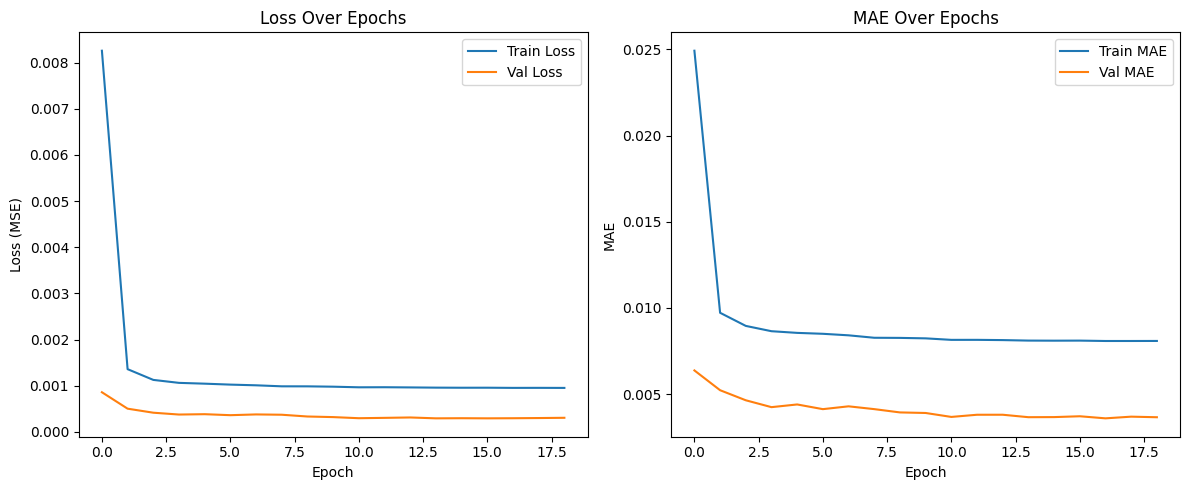

✅ Training plot saved as: ae_training_plot.png


In [7]:
# 显示并保存图像,图像将保存在当前 Colab 工作目录中（可从左侧「Files」下载）
plot_training_history(history, save_path='ae_training_plot.png')

In [8]:
from models.ae_evaluation import compute_reconstruction_error, evaluate_anomaly_detection, plot_reconstruction_error_distribution, visualize_reconstruction

In [9]:
re = compute_reconstruction_error(best_model, X_test)

4005/4005 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


In [10]:
evaluate_anomaly_detection(re, y_test)

{'threshold': np.float64(0.0036685816814053538),
 'precision': np.float64(0.5818591186876809),
 'recall': np.float64(0.6334033613445378),
 'f1': np.float64(0.6065381390951025),
 'roc_auc': np.float64(0.9846515384657),
 'confusion_matrix': {'TP': np.int64(1809),
  'FP': np.int64(1300),
  'TN': np.int64(124002),
  'FN': np.int64(1047)}}

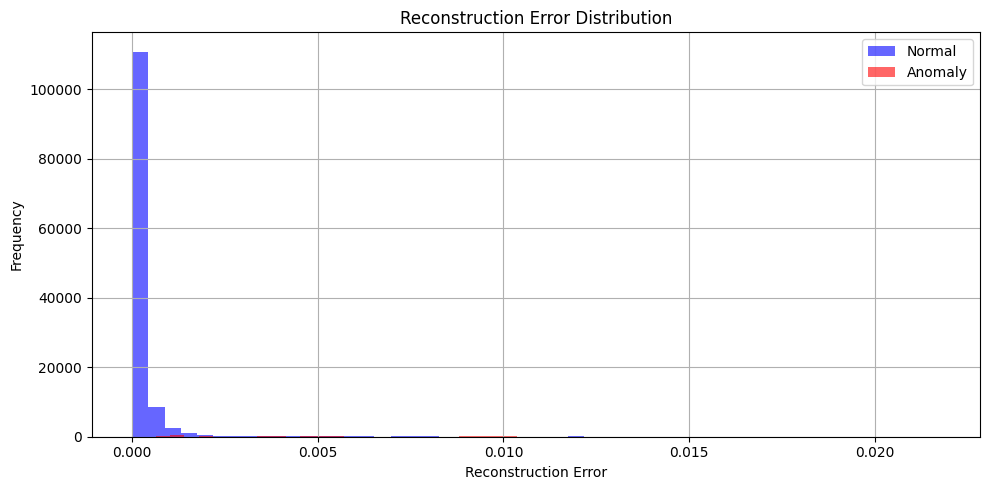

In [11]:
plot_reconstruction_error_distribution(re, y_test)

4005/4005 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


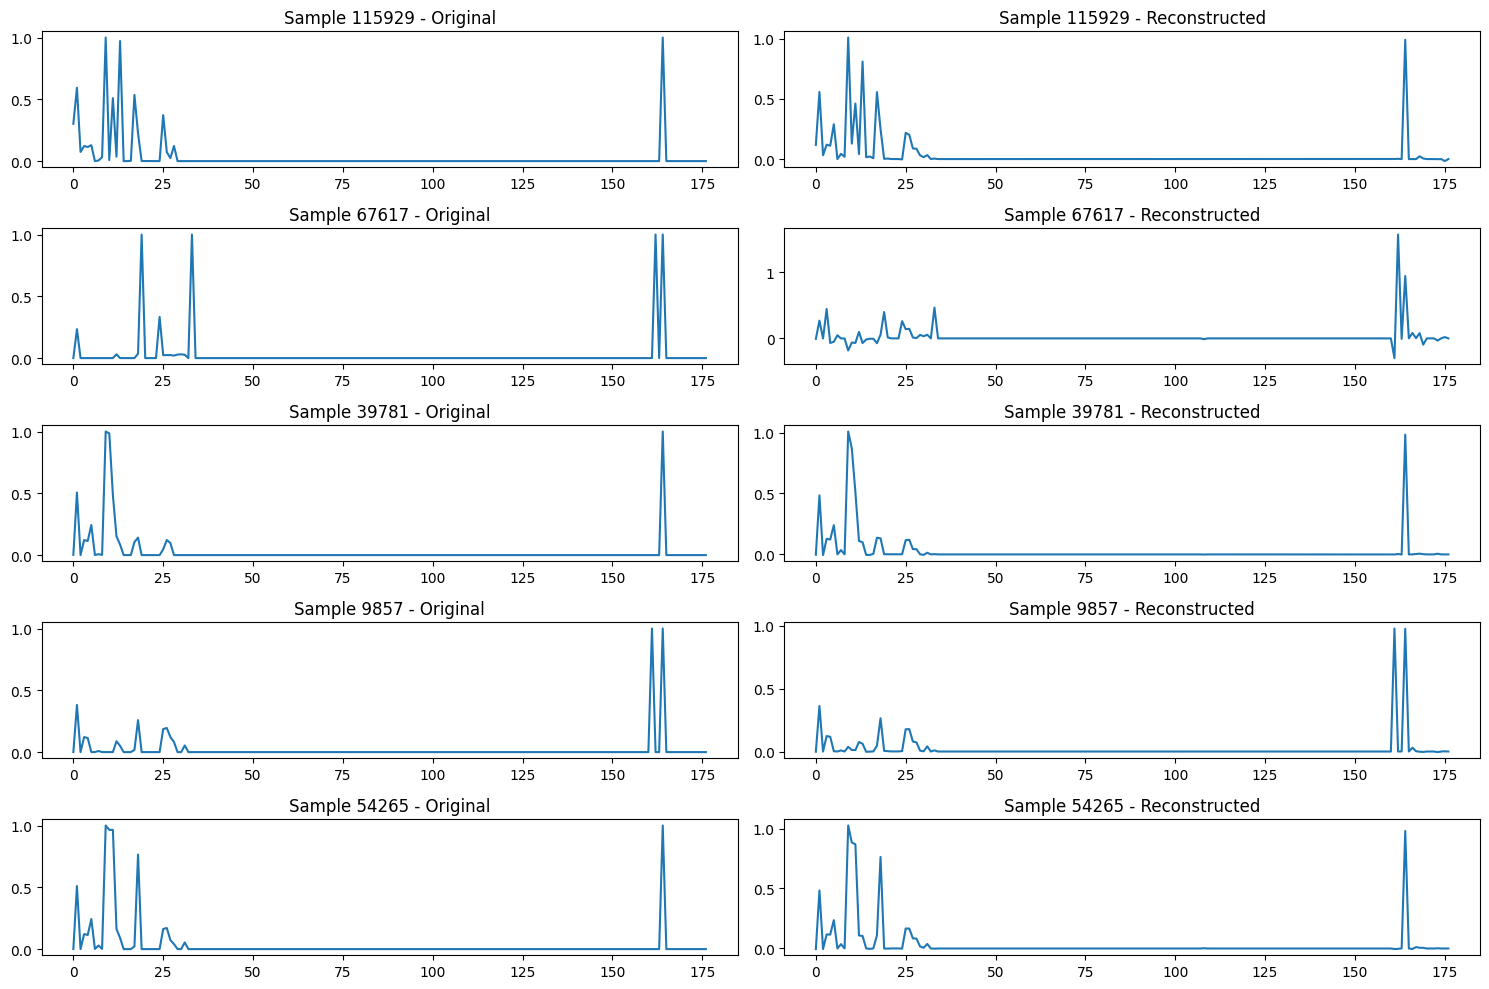

In [12]:
visualize_reconstruction(best_model, X_test.to_numpy())